In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

sns.set_style('darkgrid')

In [2]:
with open('logins.json', 'r') as datafile:
    log_data = json.load(datafile)
df = pd.DataFrame(log_data)

In [3]:
df['login_time'] = pd.to_datetime(df['login_time'])

In [4]:
df = df.set_index('login_time')
df['count'] = 1

In [5]:
df = df.resample('15T').sum()

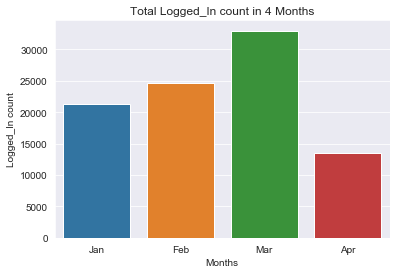

In [6]:
sns.barplot(['Jan', 'Feb', 'Mar', 'Apr'], [21239 , 24673, 32953, 13507])
plt.xlabel('Months')
plt.ylabel('Logged_In count')
plt.title('Total Logged_In count in 4 Months');

C:\Users\oneaf\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


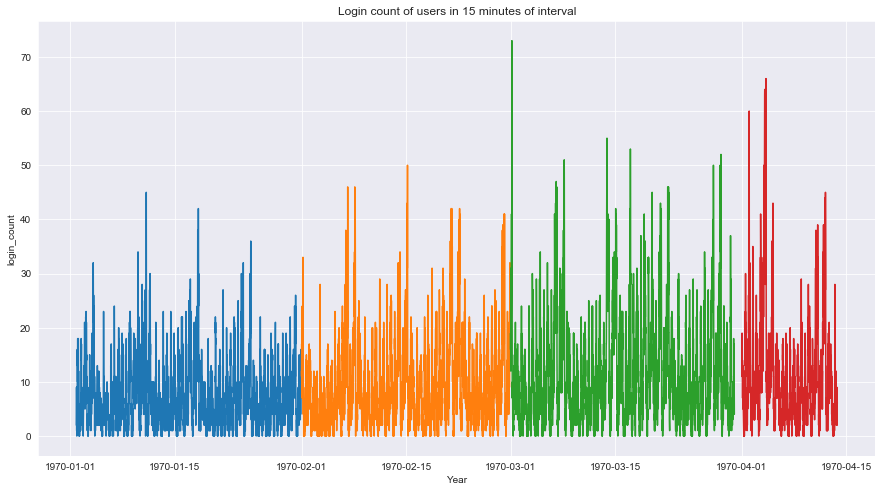

In [7]:
plt.figure(figsize=(15,8))
plt.plot(df['1970-01-01':'1970-01-31'])
plt.plot(df['1970-02-01':'1970-02-28'])
plt.plot(df['1970-03-01':'1970-03-30'])
plt.plot(df['1970-04-01':'1970-04-30'])
plt.xlabel('Year')
plt.ylabel('login_count')
plt.title('Login count of users in 15 minutes of interval')
plt.show()

In [8]:
print('Total user logged in {} with in an Average of {} where maximum count reached to {} in January'.format(df['1970-01-01':'1970-01-31']['count'].sum(), round(df['1970-01-01':'1970-01-31']['count'].mean()), df['1970-01-01':'1970-01-31']['count'].max()))
print('Total user logged in {} with in an Average of {} where maximum count reached to {} in February'.format(df['1970-02-01':'1970-02-28']['count'].sum(), round(df['1970-02-01':'1970-02-28']['count'].mean()), df['1970-02-01':'1970-02-28']['count'].max()))
print('Total user logged in {} with in an Average of {} where maximum count reached to {} in March'.format(df['1970-03-01':'1970-03-30']['count'].sum(), round(df['1970-03-01':'1970-03-30']['count'].mean()), df['1970-03-01':'1970-03-30']['count'].max()))
print('Total user logged in {} with in an Average of {} where maximum count reached to {} in April'.format(df['1970-04-01':'1970-04-30']['count'].sum(), round(df['1970-04-01':'1970-04-30']['count'].mean()), df['1970-04-01':'1970-04-30']['count'].max()))

Total user logged in 21239 with in an Average of 7 where maximum count reached to 45 in January
Total user logged in 24673 with in an Average of 9 where maximum count reached to 50 in February
Total user logged in 32953 with in an Average of 11 where maximum count reached to 73 in March
Total user logged in 13507 with in an Average of 11 where maximum count reached to 66 in April


<b>Part 2 ‐ Experiment and metrics design</b><br>
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: <br>
<ol>
    <li>how you will implement the experiment</li>
    <li>what statistical test(s) you will conduct to verify the significance of the observation</li>
    <li>how you would interpret the results and provide recommendations to the city operations team along with any caveats</li>
</ol>

<b>Solution</b><br>
I would suggest to increasing reimbursement of the toll tax by number of times driver crossed the bridge so that driver partners get attracted to cross the bridge.
It will help them to maintain the fare of each ride allowing passengers to take more ride for personal as well business purpose.
Post couple of months I will take a sample collection of <= 30, assuming the null hypothesis – Driver partners are available in both cities.
I will be applying t-statistic then to very my hypothesis.

In [9]:
with open('ultimate_data_challenge.json', 'r') as datafile:
    data = json.load(datafile)
data = pd.DataFrame(data)

In [10]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [11]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [12]:
data['avg_rating_of_driver'] = data['avg_rating_of_driver'].fillna(round(data['avg_rating_of_driver'].mean(), 1))

In [13]:
data['phone'] = data['phone'].fillna(data['phone'].mode()[0])

In [14]:
data['avg_rating_by_driver'] = data['avg_rating_by_driver'].fillna(round(data['avg_rating_by_driver'].mean(), 1))

In [15]:
data.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [16]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


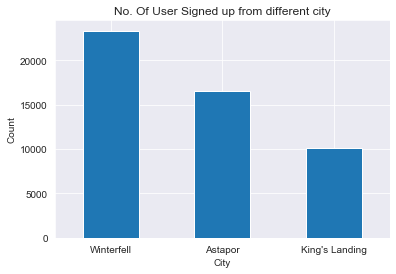

In [17]:
data.city.value_counts().plot(kind='bar')
plt.xticks(rotation=360)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('No. Of User Signed up from different city');

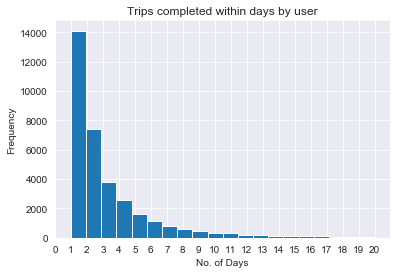

In [18]:
data.trips_in_first_30_days.plot(kind='hist', bins = 20, range = [1, 20])
plt.xticks(range(21))
plt.xlabel('No. of Days')
plt.ylabel('Frequency')
plt.title('Trips completed within days by user');

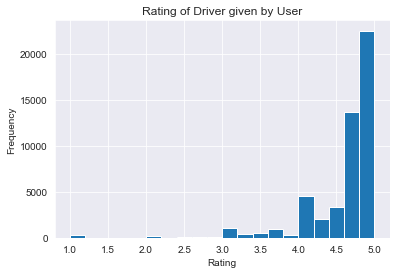

In [19]:
data.avg_rating_of_driver.plot(kind = 'hist', bins = 20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating of Driver given by User');

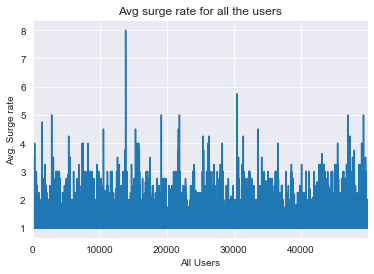

In [20]:
data.avg_surge.plot(kind='line')
plt.xlabel('All Users')
plt.ylabel('Avg. Surge rate')
plt.title('Avg surge rate for all the users');

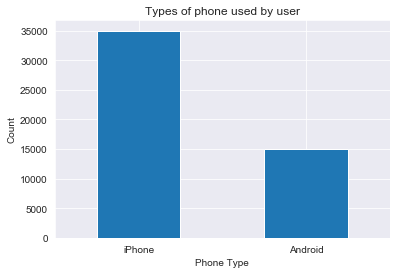

In [21]:
data.phone.value_counts().plot(kind = 'bar')
plt.xticks(rotation=360)
plt.xlabel('Phone Type')
plt.ylabel('Count')
plt.title('Types of phone used by user');

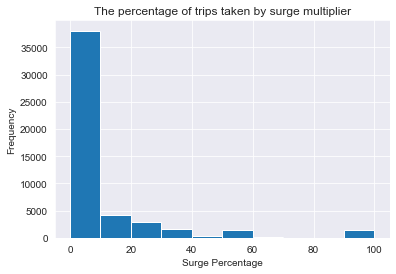

In [22]:
data.surge_pct.plot(kind = 'hist', bins = 10)
plt.xlabel('Surge Percentage')
plt.ylabel('Frequency')
plt.title('The percentage of trips taken by surge multiplier');

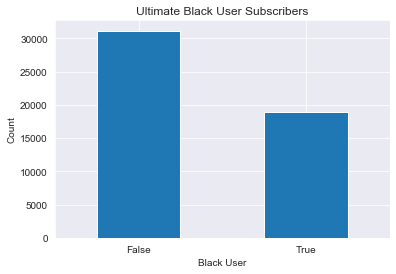

In [23]:
data.ultimate_black_user.value_counts().plot(kind='bar')
plt.xticks(rotation=360)
plt.xlabel('Black User')
plt.ylabel('Count')
plt.title('Ultimate Black User Subscribers');

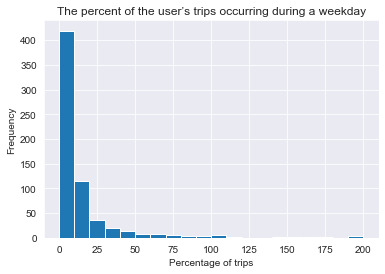

In [24]:
data.weekday_pct.value_counts().plot(kind = 'hist', bins = 20, range = [0, 200])
plt.xlabel('Percentage of trips')
plt.ylabel('Frequency')
plt.title('The percent of the user’s trips occurring during a weekday');

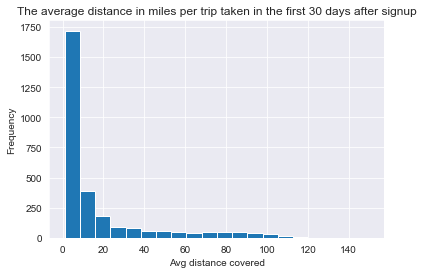

In [25]:
data.avg_dist.value_counts().plot(kind = 'hist', bins = 20)
plt.xlabel('Avg distance covered')
plt.ylabel('Frequency')
plt.title('The average distance in miles per trip taken in the first 30 days after signup');

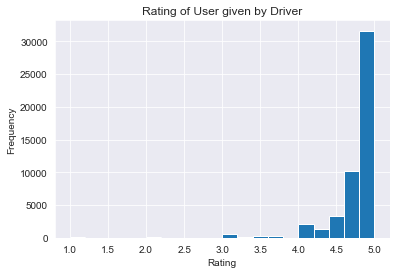

In [26]:
data.avg_rating_by_driver.plot(kind = 'hist', bins = 20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating of User given by Driver');

In [27]:
activity = []
activities = pd.to_datetime(data['last_trip_date']) - pd.to_datetime(data['signup_date'])
for i in activities:
    activity.append(i.days)
data['activity'] = activity

In [28]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,activity
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47


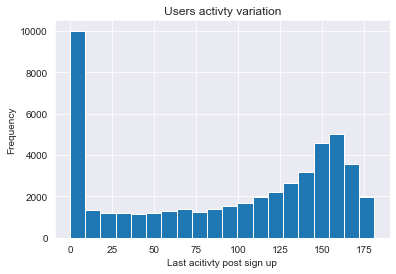

In [29]:
data.activity.plot(kind = 'hist', bins = 20)
plt.xlabel('Last acitivty post sign up')
plt.ylabel('Frequency')
plt.title('Users activty variation');

In [30]:
data = data.drop(['last_trip_date', 'signup_date'], axis = 1)

In [31]:
data['city'] = data['city'].map({"King's Landing" : 0, "Astapor" : 1, "Winterfell" : 2})
data['phone'] = data['phone'].map({"iPhone" : 0, "Android" : 1})
data['ultimate_black_user'] = data['ultimate_black_user'].map({True : 1, False : 0})

In [32]:
data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,activity
0,0,4,4.7,1.10,0,15.4,1,46.2,3.67,5.0,143
1,1,0,5.0,1.00,1,0.0,0,50.0,8.26,5.0,96
2,1,3,4.3,1.00,0,0.0,0,100.0,0.77,5.0,1
3,0,9,4.6,1.14,0,20.0,1,80.0,2.36,4.9,170
4,2,14,4.4,1.19,1,11.8,0,82.4,3.13,4.9,47


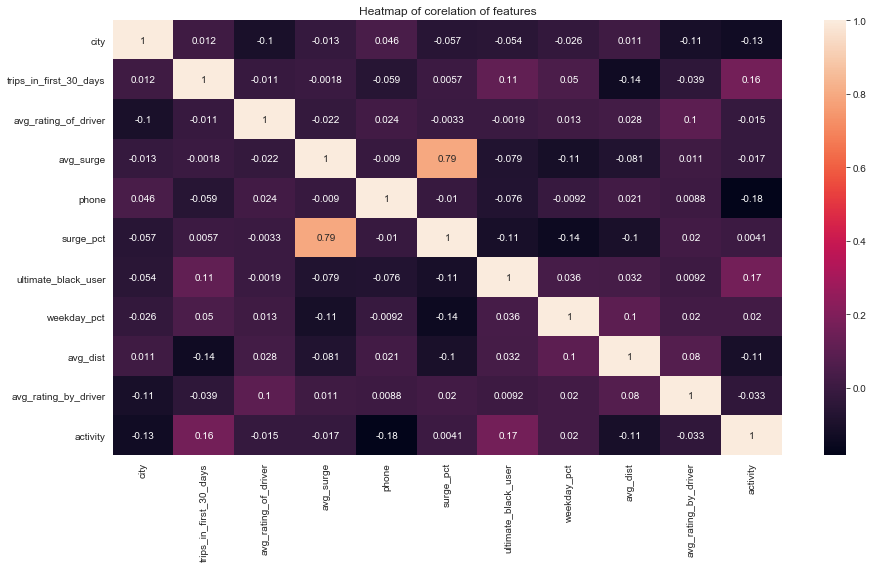

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Heatmap of corelation of features')
plt.show()

In [34]:
data['retained'] = data.activity <= 30
data['retained'] = data['retained'].map({True : 1, False : 0})

In [35]:
print('Percentage of users retained in last 30 days: ', round((len(data[data.retained == 1]) / len(data)) * 100, 2))

Percentage of users retained in last 30 days:  26.05


In [36]:
data['6th_month_activity'] = data.activity >= 150
data['6th_month_activity'] = data['6th_month_activity'].map({True : 1, False : 0})

In [37]:
print('Percentage of users retained in 6Th Month: ', round(len(data[data['6th_month_activity'] == 1]) / len(data) * 100, 2))

Percentage of users retained in 6Th Month:  25.43


In [38]:
data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,activity,retained,6th_month_activity
0,0,4,4.7,1.10,0,15.4,1,46.2,3.67,5.0,143,0,0
1,1,0,5.0,1.00,1,0.0,0,50.0,8.26,5.0,96,0,0
2,1,3,4.3,1.00,0,0.0,0,100.0,0.77,5.0,1,1,0
3,0,9,4.6,1.14,0,20.0,1,80.0,2.36,4.9,170,0,1
4,2,14,4.4,1.19,1,11.8,0,82.4,3.13,4.9,47,0,0


In [39]:
X = data.drop(['city', 'surge_pct', 'retained', '6th_month_activity'], axis = 1)
y = data['6th_month_activity']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter = 1000)

In [42]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, lr.predict(X_test))

array([[11185,     0],
       [    0,  3815]], dtype=int64)

In [45]:
print('{}% of users will be active in 6Th Month'.format(round(11185 / len(X_test) * 100, 2)))

74.57% of users will be active in 6Th Month


In [46]:
print('Accuracy of the Model is {}%'.format(int(lr.score(X_test, y_test) * 100)))

Accuracy of the Model is 100%


<b>Suggestion</b>
<ul>
    <li>User should get more Surge per ride</li>
    <li>Driver should make drive more comfortable to user to get high rating</li>
    <li>offers should provide to immediate users who joined to retain the customers</li>
<ul>